In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
epigenetics = pd.read_excel("Epigenetic age_Cleaned_18042024.xlsx")

In [3]:
epigenetics

,Samples,redcap_event_name.x,Age_at_blood_colletion,Sex,predictedSex,Date_of_blood_collection,demogr_dob,PCHorvath1,PCHorvath2,PCHannum,...,PCHannumResid,PCPhenoAgeResid,PCGrimAgeResid,PCDNAmTLResid,DunedinPACE,DunedinPoAm,Sample_Well,Sample_Plate,Sentrix_ID,Sentrix_Position
0,50486,baseline_arm_3,87.967123,M,M,2020-11-18,1932-12-22,69.448421,69.457668,81.922419,...,3.935911,3.201980,4.676281,-0.066568,1.327366,1.268623,A08,NPM.SG90-SCHS.JUL21.EPIC.P0001,205008390025,R01C01
1,14756,baseline_arm_3,90.364384,M,M,2020-11-02,1930-07-15,76.137231,82.284793,89.471112,...,-3.759621,-2.067831,-0.265583,0.218449,1.125325,0.962394,B08,NPM.SG90-SCHS.JUL21.EPIC.P0001,205008390025,R02C01
2,78180,baseline_arm_3,87.079452,F,F,2020-07-22,1933-07-15,62.667897,64.518189,73.575334,...,-4.411174,-7.199847,-4.282974,0.169952,1.030354,1.115079,C08,NPM.SG90-SCHS.JUL21.EPIC.P0001,205008390025,R03C01
3,13152,baseline_arm_3,90.608219,F,F,2020-11-23,1930-05-08,83.282703,89.527262,98.420205,...,5.189472,6.021065,3.622674,-0.041436,1.309475,0.901944,D08,NPM.SG90-SCHS.JUL21.EPIC.P0001,205008390025,R04C01
4,42460,baseline_arm_3,90.238356,F,F,2020-09-17,1930-07-15,75.330680,89.830096,90.069834,...,-3.160899,-5.678726,-4.465556,-0.130297,1.306365,1.097990,E08,NPM.SG90-SCHS.JUL21.EPIC.P0001,205008390025,R05C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,90062,baseline_arm_1,86.580822,M,M,2016-08-29,1930-02-20,68.438141,71.272830,81.480660,...,-4.753944,-8.286939,-3.363474,0.034731,1.279806,1.118464,B04,Anis Labis Plate 4,206544450167,R02C01
430,90201,baseline_arm_1,88.597260,F,F,2018-07-16,1930-01-01,80.095096,83.713795,90.114503,...,2.778388,-1.416665,-3.462144,-0.014615,0.999639,1.103699,C04,Anis Labis Plate 4,206544450167,R03C01
431,36779,baseline_arm_3,90.295890,F,F,2019-10-09,1929-07-15,96.518481,99.838578,105.519174,...,17.081550,20.602913,6.652979,-0.214429,1.330784,1.162793,E04,Anis Labis Plate 4,206544450167,R05C01
432,53795,baseline_arm_3,90.424658,M,M,2019-07-25,1929-03-14,71.054579,72.001533,80.025522,...,-8.412103,-10.939180,1.392886,0.225369,1.211247,1.041648,F04,Anis Labis Plate 4,206544450167,R06C01


In [10]:
# Step 1: Calculate the average of the specific columns
epigenetics['Epigenetic_average'] = epigenetics[['PCHorvath1', 'PCHannum', 'PCPhenoAge', "PCGrimAge"]].median(axis=1)

# Step 2: Subtract the "Age_at_blood_collection" from this average
epigenetics['Epigenetic_deviation'] = epigenetics['Epigenetic_average'] - epigenetics['Age_at_blood_colletion']

In [11]:
important_columns = ["Samples", "Date_of_blood_collection", "Age_at_blood_colletion", 'Epigenetic_average', "Epigenetic_deviation"] 
df = epigenetics[important_columns]

In [12]:
df = df.rename(columns={"Samples":"Sample_ID", "Age_at_blood_colletion":"Age_at_blood_collection" })
df.to_csv('Epigenetic_Processed.csv', index=False)

In [13]:
df

,Sample_ID,Date_of_blood_collection,Age_at_blood_collection,Epigenetic_average,Epigenetic_deviation
0,50486,2020-11-18,87.967123,75.685420,-12.281704
1,14756,2020-11-02,90.364384,80.851700,-9.512683
2,78180,2020-07-22,87.079452,68.121615,-18.957837
3,13152,2020-11-23,90.608219,86.368565,-4.239655
4,42460,2020-09-17,90.238356,78.348439,-11.889918
...,...,...,...,...,...
429,90062,2016-08-29,86.580822,74.246342,-12.334480
430,90201,2018-07-16,88.597260,80.790249,-7.807011
431,36779,2019-10-09,90.295890,96.104674,5.808784
432,53795,2019-07-25,90.424658,75.540051,-14.884607


C:\Users\wehne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


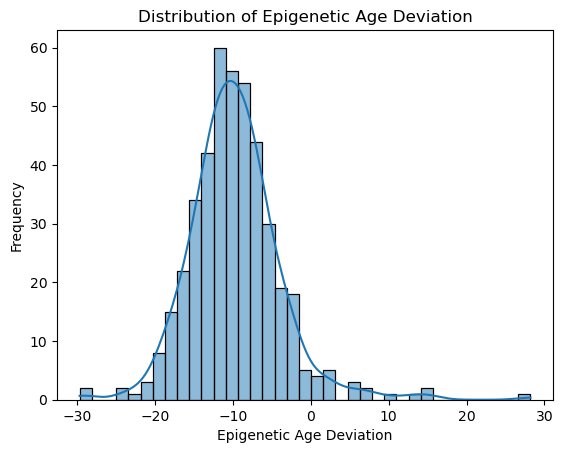

C:\Users\wehne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


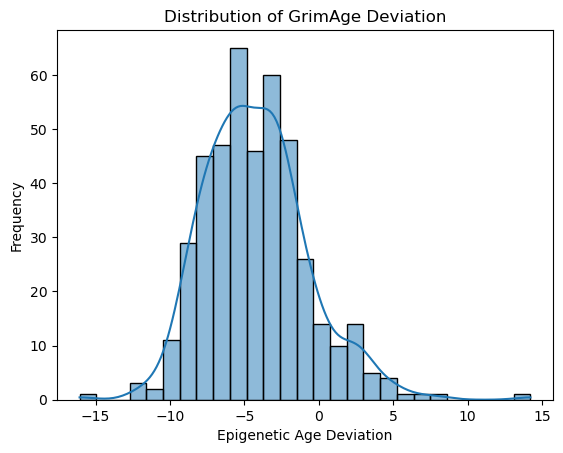

In [14]:

# Step 3: Plot the resulting column
sns.histplot(epigenetics['Epigenetic_deviation'], kde=True)
plt.title("Distribution of Epigenetic Age Deviation")
plt.xlabel("Epigenetic Age Deviation")
plt.ylabel("Frequency")

plt.savefig('epigenetic_age_deviation.jpg')
plt.show()

#print(f"Mean: ", np.mean(epigenetics["pigenetic_deviation"]))
#print(f"Median: ", np.median(epigenetics["epigenetic_deviation"]))

epigenetics['GrimAge_deviation'] = epigenetics['PCGrimAge'] - epigenetics['Age_at_blood_colletion']

# Step 3: Plot the resulting column
sns.histplot(epigenetics['GrimAge_deviation'], kde=True)
plt.title("Distribution of GrimAge Deviation")
plt.xlabel("Epigenetic Age Deviation")
plt.ylabel("Frequency")

plt.savefig('epigenetic_age_deviation.jpg')
plt.show()


In [9]:
epigenetics['Epigenetic_deviation'].describe()

count    434.000000
mean      -9.555293
std        6.644249
min      -32.004522
25%      -13.454450
50%      -10.298763
75%       -6.316053
max       30.210243
Name: Epigenetic_deviation, dtype: float64

In [9]:
epigenetics['GrimAge_deviation'].to_csv("GrimAgeDeviation.csv

count    434.000000
mean      -4.215652
std        3.516343
min      -16.081370
25%       -6.758644
50%       -4.492213
75%       -2.399118
max       14.227033
Name: GrimAge_deviation, dtype: float64